##  Assignment 3

In [1]:
import pandas as pd
from plotnine import *

### Question 1 — Delay Distribution by Mode

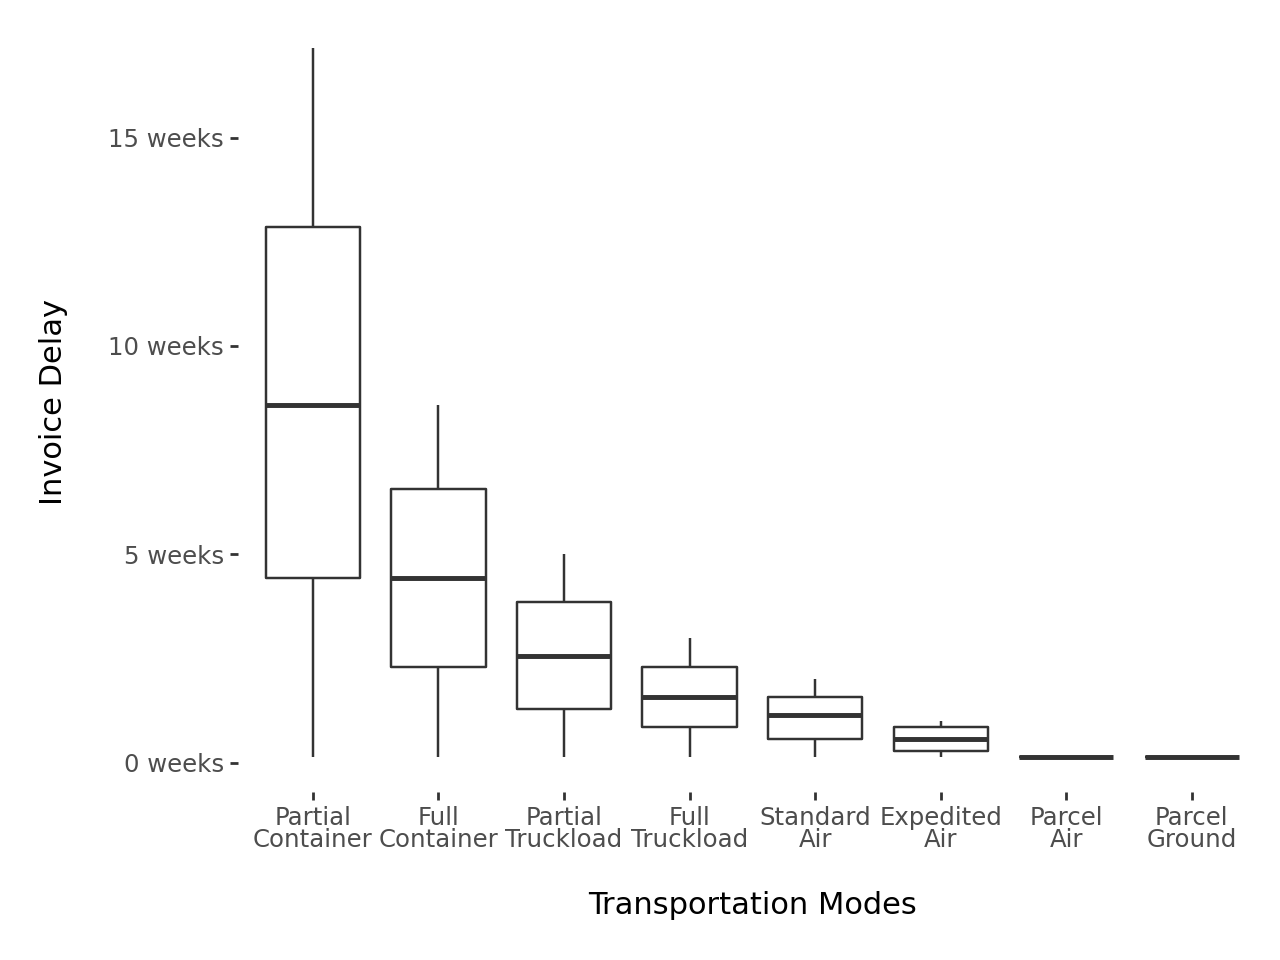

In [2]:
tr_data = pd.read_csv("../data/tr_data.csv")

tr_data = tr_data.dropna(subset = ["mode"])
tr_data = tr_data[tr_data["mode"] != "other"]

tr_data["invoice_date"] = pd.to_datetime(tr_data["invoice_date"])
tr_data["shipping_date"] = pd.to_datetime(tr_data["shipping_date"])
tr_data["invoice_delay"] = tr_data["invoice_date"] - tr_data["shipping_date"]

fancy_names = {
    "less_container_load":"Partial\nContainer",
    "full_container_load":"Full\nContainer",
    "less_truck_load":"Partial\nTruckload",
    "truck_load": "Full\nTruckload",
    "std_air":"Standard\nAir",
    "exp_air":"Expedited\nAir",
    "parcel_air":"Parcel\nAir",
    "parcel_grund":"Parcel\nGround"
    }

tr_data["mode"] = tr_data["mode"].replace(fancy_names)


p = ggplot(data = tr_data, mapping = aes(x = "reorder(mode, -invoice_delay)", y = "invoice_delay", group = "mode"))
           
p = p + geom_boxplot() + labs(x = "\nTransportation Modes\n", y = "\nInvoice Delay\n") + theme_tufte()

p

In [3]:
ggsave(p, filename = "../plots/delay_dist_by_mode.png", width=10, height = 5, units="in", dpi=300)

c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 5 in image.
c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/delay_dist_by_mode.png


### Question 2 — Invoice Time Series

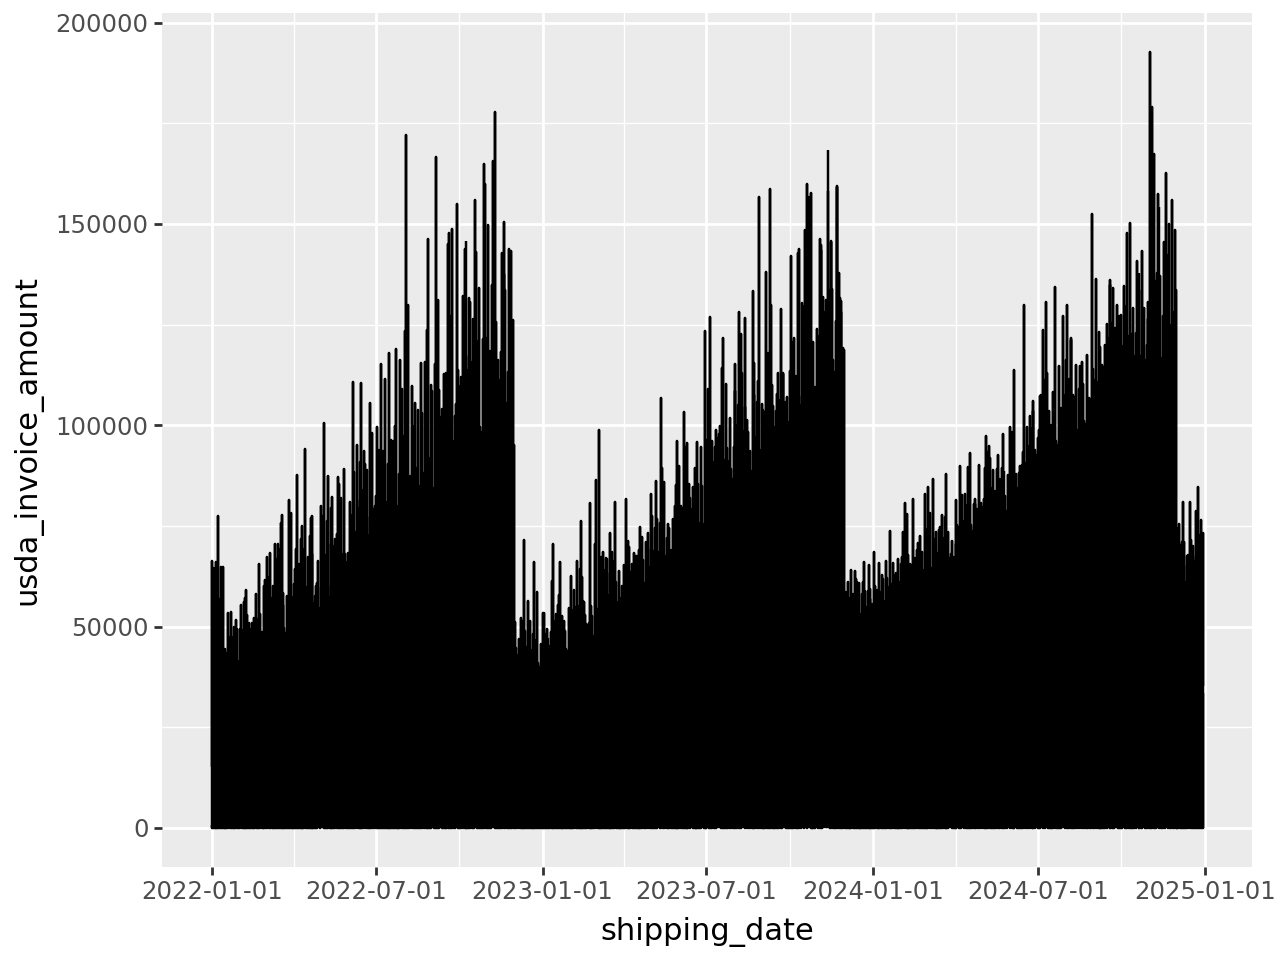

In [4]:
p1 = ggplot(data = tr_data, mapping = aes(x = "shipping_date", y = "usda_invoice_amount", group = "shipping_date"))

p1 = p1 + geom_line()

p1

##### This initial plot seems to show seasonality with the value of shipments ramping up and down in a pattern. This is the combination of all modes though so it isn't clear if this trend appliers to all modes and we are most interested in the modes with the highest invoice delays.

##### As you suggested in the question it would make sense to split this up by mode so that we can see if our container load and truckload categories which have the highest invoice delays also follow this seasonal trend.

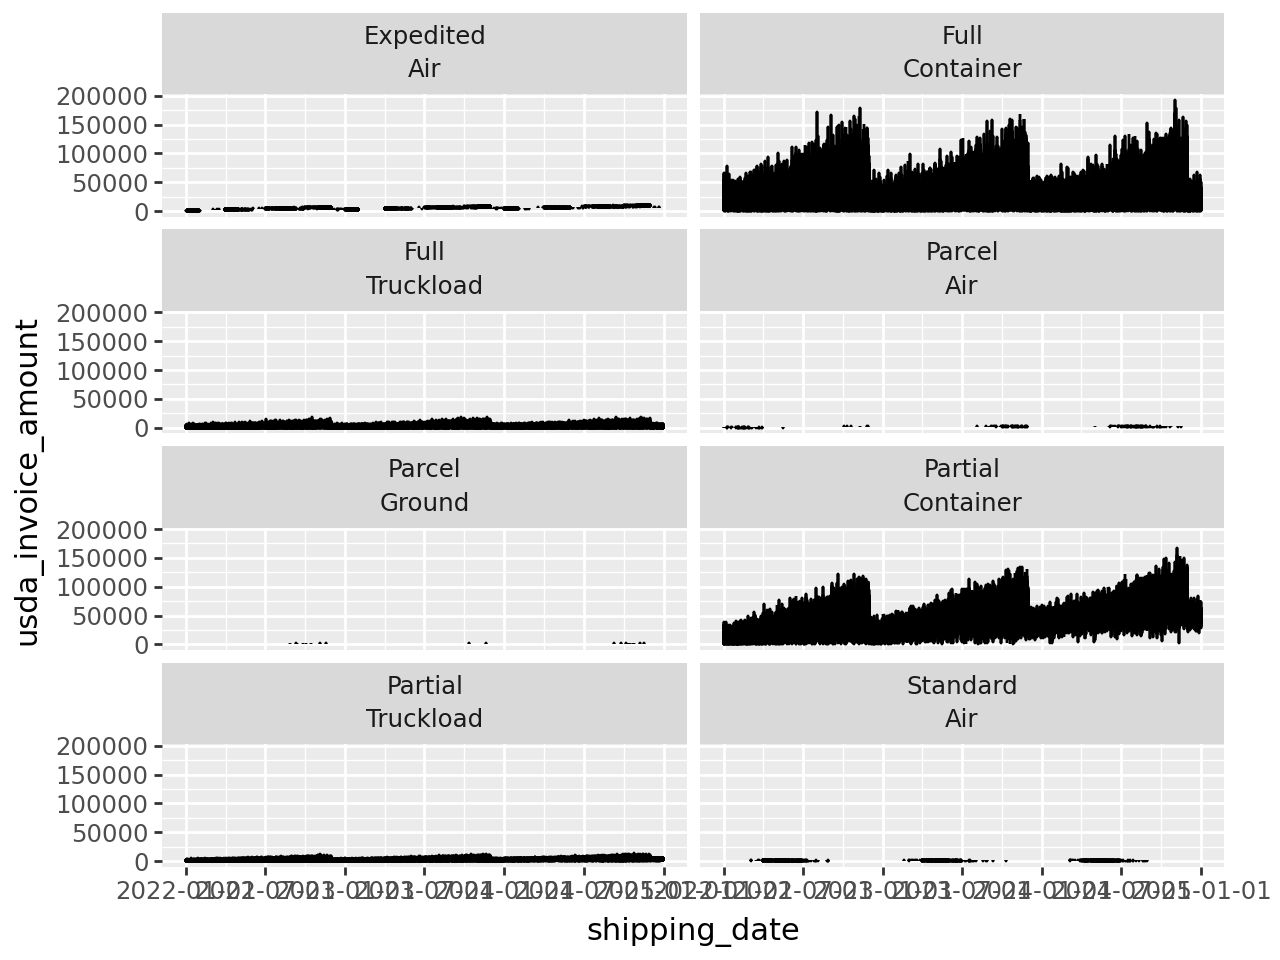

In [5]:
p1 = p1 + geom_line() + facet_wrap("mode", ncol=2)

p1

##### Now we can see that container and truck shipments follow this seasonal trend and also have the highest dollar value of the different modes.

##### I'm still note excited about this plot even with the facets because it has all of the modes and I am only interested in container and truckload shipments since they represent the most dollars and have the largest delays. The delays of 1 or 2 weeks are not significant enough to be an issue so I will reduce the 

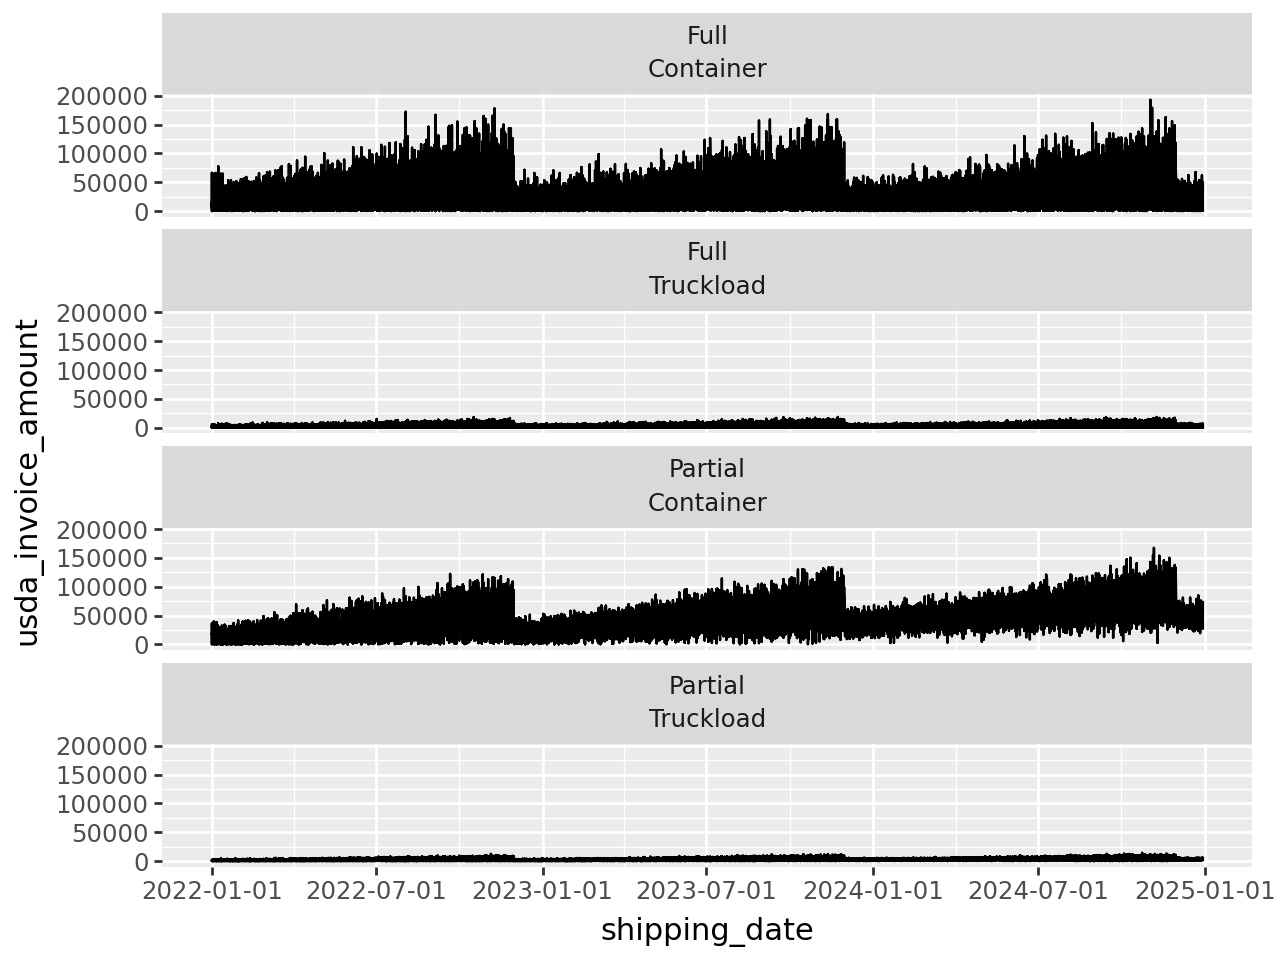

In [6]:
modes_to_keep = ["Partial\nContainer", "Full\nContainer", "Partial\nTruckload", "Full\nTruckload"]

tr_data_short = tr_data[tr_data["mode"].isin(modes_to_keep)]

p1 = ggplot(data = tr_data_short, mapping = aes(x = "shipping_date", y = "usda_invoice_amount"))

p1 = p1 + geom_line() + facet_wrap("mode", ncol=1)

p1

##### I think this would make more sense if the x axis were months of the year and there were lines representing each year. I have been trying to add a column to capture the year so that I could group by the year values and get three individual lines per facet but I kept getting errors so I have removed all that. I will stick with the plot I have for the sake of this assignment.

c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 5 in image.
c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/seasonality_by_mode.png


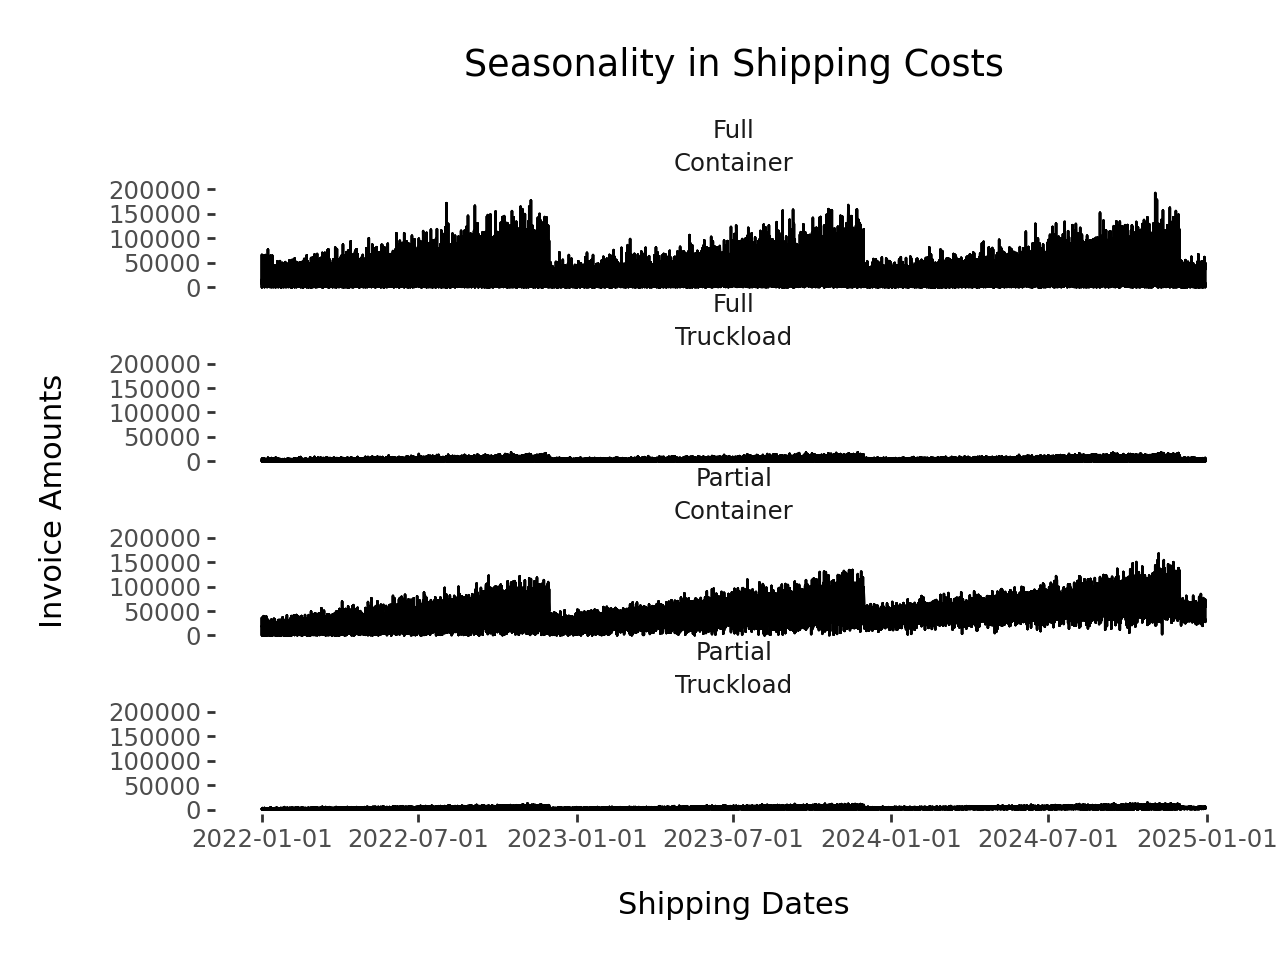

In [7]:
p1 = p1 + geom_line() + facet_wrap("mode", ncol=1) + labs(x = "\nShipping Dates\n", y = "\nInvoice Amounts\n", title="\nSeasonality in Shipping Costs\n") + theme_tufte()


ggsave(p1, filename = "../plots/seasonality_by_mode.png", width=10, height = 5, units="in", dpi=300)

p1

## Question 3 — Cost Estimation and Forecasting

##### There is a strong seasonal trend in the value of shipments made over time. less than container load and full container load shipments are the highest value by far so focusing on those two categories would make a big improvement if we were specifically interested in dollar value for budgeting.

##### If the goal is really to forecast shipping costs ourselves (instead of getting estimates from the carrier which seems like a much more straightforward process) then we can definitely consider seasonality. It would also be nice to see if the invoice delay for a full container load shipment varies with a trend over the course of the year. That is to say does the length of the delay also increase in parallel with value of the shipment or do more valuable shipments have less of a delay?

##### Either way if we were in February and wanting to forecast our transportation costs for June the trend we are seeing would be informative.

## References

##### During the process of this assignment I travelled around a lot online troubleshooting error messages and brainstorming ways to do things differently. I'm not clear how to reference the hundred different search terms or pages I may have accessed in the process. I haven't copied anything I saw online but I definitely didn't complete this assignment without using search engines.